# Case Study 6.1 - NYC Taxi Trips

<h1 style="color:red;">Note: If you close this notebook at any time, you will have to run all cells again upon re-opening it.</h1>

<h1 style="color:red;">Note: You may get different numerical results running the notebook different times. This is to be expected, you can just report whatever results you get.</h1>

# ADVANCED PYTHON

As this is an advanced version, we don't include a lot of code here. If you get stuck on a particular part, feel free to also use the beginner version in `beginnner_python.ipynb` to help you out.

# Identification Information

In [45]:
# YOUR NAME              = "Ahmed Mohamed"
# YOUR MITX PRO USERNAME = "Almekdad"
# YOUR MITX PRO E-MAIL   = "a7mad.mohammad@gmail.com"

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

In [10]:
!pip install -r requirements.txt

     |████████████████████████████████| 133kB 3.7MB/s eta 0:00:01
     |████████████████████████████████| 5.6MB 31.5MB/s eta 0:00:01


     |████████████████████████████████| 24.5MB 44kB/s  eta 0:00:01███████████▎      | 19.4MB 7.3MB/s eta 0:00:01��████▊   | 21.9MB 4.2MB/s eta 0:00:01


ERROR: scikit-bio 0.5.5 has requirement pandas>=0.23, but you'll have pandas 0.20.3 which is incompatible.
ERROR: nimbusml 0.6.5 has requirement pandas>=0.22, but you'll have pandas 0.20.3 which is incompatible.
ERROR: kqlmagic 0.1.95 has requirement pandas>=0.22.0, but you'll have pandas 0.20.3 which is incompatible.
ERROR: azureml-train-automl 1.0.33 has requirement onnxmltools==1.4.0; python_version < "3.7", but you'll have onnxmltools 1.3.0 which is incompatible.
ERROR: azureml-train-automl 1.0.33 has requirement pandas<=0.23.4,>=0.21.0, but you'll have pandas 0.20.3 which is incompatible.
  Found existing installation: botocore 1.12.174
    Uninstalling botocore-1.12.174:
      Successfully uninstalled botocore-1.12.174
  Found existing installation: boto3 1.9.174
    Uninstalling boto3-1.9.174:
      Successfully uninstalled boto3-1.9.174
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4


# Import

In [25]:
import featuretools as ft
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
from featuretools.primitives import (Count, Day, Hour, Max, Mean, Median, Min,
                                     Minute, Month, Std, Sum, Week, Weekday,
                                     Weekend)
from sklearn.ensemble import GradientBoostingRegressor
from utils import (compute_features, feature_importances, load_nyc_taxi_data,
                   preview)

print('Import successful!')

Import successful!


In [15]:
%matplotlib inline

In [16]:
assert ft.__version__ == '0.1.19'

# Data

- Use `load_nyc_taxi_data` to get the data.
- Use `preview` to preview the data.
- Create a histogram of the `trip_duration` column of the `trips` table.

In [17]:
# Your code here to load, preview and visualize data
trips, pickup_neighborhoods, dropoff_neighborhoods = load_nyc_taxi_data()
preview(trips, 10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,trip_duration,pickup_neighborhood,dropoff_neighborhood
0,514030,2,2016-04-02 00:00:00,2016-04-02 00:17:00,1,2.46,-73.987595,40.754711,-73.959633,40.762836,1,1039,AA,K
1,514031,1,2016-04-02 00:00:00,2016-04-02 00:24:00,2,7.90,-73.924713,40.745567,-73.972763,40.793354,1,1454,L,U
2,514032,1,2016-04-02 00:00:00,2016-04-02 00:19:00,1,1.00,-73.989800,40.732994,-74.000557,40.742622,1,1168,H,Q
3,514033,2,2016-04-02 00:00:00,2016-04-02 00:01:00,1,0.02,-73.987465,40.719822,-73.987289,40.720016,2,35,AC,AC
4,514034,1,2016-04-02 00:01:00,2016-04-02 00:58:00,2,19.00,-73.790131,40.643429,-73.975594,40.779327,1,3470,G,I
5,514035,1,2016-04-02 00:01:00,2016-04-02 00:09:00,2,1.50,-73.981956,40.765518,-73.968124,40.753407,1,458,AR,N
6,514036,1,2016-04-02 00:01:00,2016-04-02 00:05:00,1,1.50,-73.980019,40.780594,-73.968132,40.799595,2,213,AV,U
7,514037,1,2016-04-02 00:01:00,2016-04-02 00:20:00,1,4.20,-73.990501,40.756561,-73.986008,40.719414,2,1142,AA,AC
8,514038,1,2016-04-02 00:01:00,2016-04-02 00:10:00,1,0.60,-73.986198,40.730492,-73.991798,40.722240,1,501,AT,AC
9,514039,1,2016-04-02 00:01:00,2016-04-02 00:17:00,1,0.60,-73.990959,40.734890,-74.001816,40.739319,1,954,R,Q


*We can also plot some aspects of the data to get a better sense of its distributions. For instance, here is the trip_duration variable we are going to try to predict.*

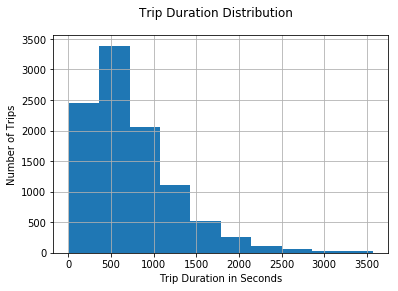

In [18]:
trips.trip_duration.hist()
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Number of Trips')
plt.suptitle('Trip Duration Distribution')
plt.show()


<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many trips are in the dataset? How would you describe the distribution of trip durations? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

In [19]:
trips.shape[0] 
trips.describe()

,id,vendor_id,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,519029.50000,1.527400,1.698100,2.743312,-73.976702,40.749273,-73.974212,40.750304,746.098900
std,2886.89568,0.499274,1.303045,3.134647,0.032755,0.027119,0.031928,0.030314,525.049496
min,514030.00000,1.000000,1.000000,0.000000,-74.027252,40.632393,-74.027252,40.630280,2.000000
25%,516529.75000,1.000000,1.000000,1.000000,-73.992891,40.733330,-73.992287,40.732718,364.000000
50%,519029.50000,2.000000,1.000000,1.700000,-73.983452,40.750420,-73.981422,40.752056,616.000000
75%,521529.25000,2.000000,2.000000,3.200000,-73.968937,40.766482,-73.962952,40.768576,988.000000
max,524029.00000,2.000000,6.000000,32.090000,-73.773987,40.849663,-73.776260,40.849686,3573.000000


*There are 10,000 trips in the dataset. The trip duration is mainly distributed between 0 and 1,000 seconds, which is about 70% of total trips. Trip duration around 500 seconds is more than 30% of total trips. When trip duration exceed 1500 seconds, the number become less and less.¶
*

# Entities and Relationships

Construct a dictionary of entities and relationships. You can read about the format of these objects `here`.

In [21]:
# Construct entities and relationships dicts 
entities = {
    "trips": (trips, "id", 'pickup_datetime'),
    "pickup_neighborhoods": (pickup_neighborhoods, "neighborhood_id"),
    "dropoff_neighborhoods": (dropoff_neighborhoods, "neighborhood_id"),
}

relationships = [("pickup_neighborhoods", "neighborhood_id", "trips", "pickup_neighborhood"),
                 ("dropoff_neighborhoods", "neighborhood_id", "trips", "dropoff_neighborhood")]

# Transform Primitives

In [22]:
# Make list of transform primtivies that only contains the Weekend object from above 
trans_primitives = [Weekend]

# This may take some time to compute
features = ft.dfs(entities=entities,
                  relationships=relationships,
                  target_entity="trips",
                  trans_primitives=trans_primitives,
                  agg_primitives=[],
                  ignore_variables={"trips": ["pickup_latitude", "pickup_longitude",
                                              "dropoff_latitude", "dropoff_longitude"]},
                  features_only=True)

In [23]:
# Then, use featuretools.dfs to get the features
# See https://docs.featuretools.com/generated/featuretools.dfs.html
# target entity should match name for trips entity in your entities dictionary
# no agg_primitives yet
# ignore the lat/long for dropoff and pickup
print(f"Number of features: {len(features)}")
features

Number of features: 13


[<Feature: vendor_id>,
 <Feature: passenger_count>,
 <Feature: trip_distance>,
 <Feature: payment_type>,
 <Feature: trip_duration>,
 <Feature: pickup_neighborhood>,
 <Feature: dropoff_neighborhood>,
 <Feature: IS_WEEKEND(pickup_datetime)>,
 <Feature: IS_WEEKEND(dropoff_datetime)>,
 <Feature: pickup_neighborhoods.latitude>,
 <Feature: pickup_neighborhoods.longitude>,
 <Feature: dropoff_neighborhoods.latitude>,
 <Feature: dropoff_neighborhoods.longitude>]

In [6]:
# Print out the features you just made

In [26]:
# Use compute_features to get the feature matrix
# compute_features expects the following args:
#      1. list of features from dfs
#      2. dataframe with id and pickup_datetime columns 
z = trips[['id', 'pickup_datetime']]
z['pickup_datetime'] = pd.to_numeric(z.pickup_datetime)

feature_matrix = compute_features(features, z)
preview(feature_matrix, 5)

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████|| Calculated: 1/1 cutoff times
Finishing computing...


,trip_distance,trip_duration,IS_WEEKEND(dropoff_datetime),dropoff_neighborhood = D,dropoff_neighborhood = AA,dropoff_neighborhood = H,dropoff_neighborhood = P,dropoff_neighborhood = AR,dropoff_neighborhood = AD,dropoff_neighborhood = A,...,pickup_neighborhood = AO,pickup_neighborhood = AD,pickup_neighborhood = Q,pickup_neighborhood = AR,pickup_neighborhood = AP,pickup_neighborhood = H,pickup_neighborhoods.latitude,IS_WEEKEND(pickup_datetime),dropoff_neighborhoods.latitude,vendor_id
id,,,,,,,,,,,,,,,,,,,,,
514030,2.46,1039,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40.757707,True,40.766809,2
514031,7.90,1454,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40.744928,True,40.793597,1
514032,1.00,1168,True,0,0,0,0,0,0,0,...,0,0,0,0,0,1,40.729652,True,40.740333,1
514033,0.02,35,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40.720245,True,40.720245,2
514034,19.00,3470,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40.646194,True,40.785005,1


# First Model

In [28]:
# Split feature matrix (75% train, 25% test) using utils.train_test_fm
# This function also takes care of removing `trip_duration` column from feature matrix
X_train, y_train, X_test, y_test = utils.get_train_test_fm(feature_matrix,.75)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
# Use np.log(x + 1) to take the log of a particular vector x - this helps create a more linear relationship
y_train = np.log(y_train + 1)
y_test = np.log(y_test + 1)

In [30]:
# Then, create a GradientBoostingRegressor
# Fit to training
# Score on testing
model = GradientBoostingRegressor(verbose=True)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

      Iter       Train Loss   Remaining Time 
         1           0.4736            2.49s
         2           0.4148            1.97s
         3           0.3661            1.60s
         4           0.3266            1.43s
         5           0.2934            1.36s
         6           0.2665            1.29s
         7           0.2441            1.34s
         8           0.2257            1.37s
         9           0.2103            1.43s
        10           0.1973            1.36s
        20           0.1434            1.28s
        30           0.1312            1.11s
        40           0.1248            0.90s
        50           0.1218            0.69s
        60           0.1191            0.53s
        70           0.1174            0.38s
        80           0.1158            0.24s
        90           0.1147            0.12s
       100           0.1137            0.00s
0.7527788676087426


<h1 style="color:red;">QUESTION 2: FIRST MODEL</h1>

**Describe all the features that we added to the model. Do you think these improved the performance from a model that did not have these features? Why?**

*The 2 new features are : **IS_WEEKEND(pickup_datetime)** and **IS_WEEKEND(dropoff_datetime)**. I think these two feature improved the performance. Because the trip duration in the weekend tend to be longer than weekdays. It's better to use this feature to make better prediction.¶
*

# More Transform Primitives

In [31]:
# Make list of transform primtivies that contain new primitives described in the instruction manual
trans_primitives = [Minute, Hour, Day, Week, Month, Weekday, Weekend]

features = ft.dfs(entities=entities,
                  relationships=relationships,
                  target_entity="trips",
                  trans_primitives=trans_primitives,
                  agg_primitives=[],
                  ignore_variables={"trips": ["pickup_latitude", "pickup_longitude",
                                              "dropoff_latitude", "dropoff_longitude"]},
                  features_only=True)

In [32]:
# Compute features
print(f"Number of features: {len(features)}")
features

Number of features: 25


[<Feature: vendor_id>,
 <Feature: passenger_count>,
 <Feature: trip_distance>,
 <Feature: payment_type>,
 <Feature: trip_duration>,
 <Feature: pickup_neighborhood>,
 <Feature: dropoff_neighborhood>,
 <Feature: MINUTE(pickup_datetime)>,
 <Feature: MINUTE(dropoff_datetime)>,
 <Feature: HOUR(pickup_datetime)>,
 <Feature: HOUR(dropoff_datetime)>,
 <Feature: DAY(pickup_datetime)>,
 <Feature: DAY(dropoff_datetime)>,
 <Feature: WEEK(pickup_datetime)>,
 <Feature: WEEK(dropoff_datetime)>,
 <Feature: MONTH(pickup_datetime)>,
 <Feature: MONTH(dropoff_datetime)>,
 <Feature: WEEKDAY(pickup_datetime)>,
 <Feature: WEEKDAY(dropoff_datetime)>,
 <Feature: IS_WEEKEND(pickup_datetime)>,
 <Feature: IS_WEEKEND(dropoff_datetime)>,
 <Feature: pickup_neighborhoods.latitude>,
 <Feature: pickup_neighborhoods.longitude>,
 <Feature: dropoff_neighborhoods.latitude>,
 <Feature: dropoff_neighborhoods.longitude>]

In [33]:
# Compute feature matrix
feature_matrix = compute_features(features, trips[['id', 'pickup_datetime']])
preview(feature_matrix, 5)

Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████|| Calculated: 1/1 cutoff times
Finishing computing...


,IS_WEEKEND(dropoff_datetime),dropoff_neighborhood = D,dropoff_neighborhood = AA,dropoff_neighborhood = H,dropoff_neighborhood = P,dropoff_neighborhood = AR,dropoff_neighborhood = AD,dropoff_neighborhood = A,dropoff_neighborhood = AB,dropoff_neighborhood = AV,...,WEEK(pickup_datetime),trip_distance,MINUTE(pickup_datetime),HOUR(pickup_datetime),pickup_neighborhoods.latitude,payment_type,WEEKDAY(dropoff_datetime),passenger_count,WEEKDAY(pickup_datetime),DAY(pickup_datetime)
id,,,,,,,,,,,,,,,,,,,,,
514030,True,0,0,0,0,0,0,0,0,0,...,13,2.46,0,0,40.757707,1,5,1,5,2
514031,True,0,0,0,0,0,0,0,0,0,...,13,7.90,0,0,40.744928,1,5,2,5,2
514032,True,0,0,0,0,0,0,0,0,0,...,13,1.00,0,0,40.729652,1,5,1,5,2
514033,True,0,0,0,0,0,0,0,0,0,...,13,0.02,0,0,40.720245,2,5,1,5,2
514034,True,0,0,0,0,0,0,0,0,0,...,13,19.00,1,0,40.646194,1,5,2,5,2


In [34]:
# Re-split feature matrix
X_train, y_train, X_test, y_test = utils.get_train_test_fm(feature_matrix,.75)
y_train = np.log(y_train + 1)
y_test = np.log(y_test + 1)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [35]:
# Train and score NEW model
model = GradientBoostingRegressor(verbose=True)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

      Iter       Train Loss   Remaining Time 
         1           0.4736            2.11s
         2           0.4148            1.96s
         3           0.3661            1.80s
         4           0.3264            1.83s
         5           0.2930            1.91s
         6           0.2660            1.84s
         7           0.2432            1.78s
         8           0.2245            1.70s
         9           0.2090            1.63s
        10           0.1960            1.78s
        20           0.1362            1.43s
        30           0.1200            1.20s
        40           0.1126            0.98s
        50           0.1079            0.77s
        60           0.1047            0.59s
        70           0.1016            0.43s
        80           0.0986            0.28s
        90           0.0938            0.14s
       100           0.0899            0.00s
0.8059573190397493


<h1 style="color:red;">QUESTION 3: SECOND MODEL</h1>

**Describe the rest of the new features that we just added to the model. How did this affect performance? Did we have to sacrifice training time?**

*There are a lot more features added to this model. For example, **MINUTES**, **DAY**, **MONTH**, **WEEK**, **WEEKDAY**. These new features improved the model performance. The R squre value is 0.80 which was 0.75 in previous model. There is no obvious difference in training time.*

# Aggregation Primitives

In [36]:
# Make list of transform primtivies that are the same as above
# Make a list of aggregation primitives containing Count, Sum, Mean, Median, Std, Max, Min
trans_primitives = [Minute, Hour, Day, Week, Month, Weekday, Weekend]
aggregation_primitives = [Count, Sum, Mean, Median, Std, Max, Min]

features = ft.dfs(entities=entities,
                  relationships=relationships,
                  target_entity="trips",
                  trans_primitives=trans_primitives,
                  agg_primitives=aggregation_primitives,
                  ignore_variables={"trips": ["pickup_latitude", "pickup_longitude",
                                              "dropoff_latitude", "dropoff_longitude"]},
                  features_only=True)

In [37]:
# Compute features
print(f"Number of features: {len(features)}")
features

Number of features: 75


[<Feature: vendor_id>,
 <Feature: passenger_count>,
 <Feature: trip_distance>,
 <Feature: payment_type>,
 <Feature: trip_duration>,
 <Feature: pickup_neighborhood>,
 <Feature: dropoff_neighborhood>,
 <Feature: MINUTE(pickup_datetime)>,
 <Feature: MINUTE(dropoff_datetime)>,
 <Feature: HOUR(pickup_datetime)>,
 <Feature: HOUR(dropoff_datetime)>,
 <Feature: DAY(pickup_datetime)>,
 <Feature: DAY(dropoff_datetime)>,
 <Feature: WEEK(pickup_datetime)>,
 <Feature: WEEK(dropoff_datetime)>,
 <Feature: MONTH(pickup_datetime)>,
 <Feature: MONTH(dropoff_datetime)>,
 <Feature: WEEKDAY(pickup_datetime)>,
 <Feature: WEEKDAY(dropoff_datetime)>,
 <Feature: IS_WEEKEND(pickup_datetime)>,
 <Feature: IS_WEEKEND(dropoff_datetime)>,
 <Feature: pickup_neighborhoods.latitude>,
 <Feature: pickup_neighborhoods.longitude>,
 <Feature: dropoff_neighborhoods.latitude>,
 <Feature: dropoff_neighborhoods.longitude>,
 <Feature: pickup_neighborhoods.COUNT(trips)>,
 <Feature: pickup_neighborhoods.SUM(trips.vendor_id)>,
 <Fe

In [38]:
# Compute feature matrix
feature_matrix = compute_features(features, trips[['id', 'pickup_datetime']])
preview(feature_matrix, 5)

Elapsed: 00:01 | Remaining: 00:00 | Progress: 100%|██████████|| Calculated: 1/1 cutoff times
Finishing computing...


,IS_WEEKEND(dropoff_datetime),pickup_neighborhoods.MEDIAN(trips.trip_duration),pickup_neighborhoods.STD(trips.trip_distance),MONTH(pickup_datetime),dropoff_neighborhoods.STD(trips.trip_duration),WEEK(dropoff_datetime),pickup_neighborhoods.longitude,pickup_neighborhoods.MIN(trips.passenger_count),HOUR(pickup_datetime),payment_type,...,pickup_neighborhood = AO,pickup_neighborhood = AD,pickup_neighborhood = Q,pickup_neighborhood = AR,pickup_neighborhood = AP,pickup_neighborhood = H,vendor_id,pickup_neighborhoods.SUM(trips.vendor_id),DAY(dropoff_datetime),dropoff_neighborhoods.MAX(trips.trip_duration)
id,,,,,,,,,,,,,,,,,,,,,
514030,True,NaN,NaN,4,NaN,13,-73.986446,NaN,0,1,...,0,0,0,0,0,0,2,NaN,2,NaN
514031,True,NaN,NaN,4,NaN,13,-73.919159,NaN,0,1,...,0,0,0,0,0,0,1,NaN,2,NaN
514032,True,NaN,NaN,4,NaN,13,-73.991595,NaN,0,1,...,0,0,0,0,0,1,1,NaN,2,NaN
514033,True,NaN,NaN,4,NaN,13,-73.987205,NaN,0,2,...,0,0,0,0,0,0,2,NaN,2,NaN
514034,True,NaN,NaN,4,NaN,13,-73.785073,NaN,0,1,...,0,0,0,0,0,0,1,NaN,2,NaN


In [39]:
# Re-split feature matrix
X_train, y_train, X_test, y_test = utils.get_train_test_fm(feature_matrix,.75)
y_train = np.log(y_train + 1)
y_test = np.log(y_test + 1)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [40]:
# Train and score NEW model
model = GradientBoostingRegressor(verbose=True)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

      Iter       Train Loss   Remaining Time 
         1           0.4736            2.50s
         2           0.4148            2.50s
         3           0.3661            2.27s
         4           0.3264            2.08s
         5           0.2930            2.07s
         6           0.2660            1.93s
         7           0.2432            1.80s
         8           0.2245            1.80s
         9           0.2090            1.90s
        10           0.1960            1.94s
        20           0.1362            1.48s
        30           0.1200            1.21s
        40           0.1126            1.01s
        50           0.1079            0.78s
        60           0.1047            0.62s
        70           0.1016            0.46s
        80           0.0986            0.31s
        90           0.0938            0.15s
       100           0.0899            0.00s
0.8060128240391375


# Evaluate on Test Data

In [41]:
# Use .predict() function on your latest model to get y_pred from X_test
y_pred = model.predict(X_test)
y_pred = np.exp(y_pred) - 1

In [42]:
# Print some of the predictions
y_pred[:10]

array([ 453.4415368 ,  666.8066337 ,  634.00494622,  617.34019506,
        407.96332751, 1424.64561908,  465.09882412, 1151.59896332,
        645.79664106,  557.34354061])

(array([418., 739., 547., 301., 253., 100.,  61.,  40.,  29.,  12.]),
 array([  13.00778932,  284.36132154,  555.71485376,  827.06838598,
        1098.4219182 , 1369.77545042, 1641.12898264, 1912.48251486,
        2183.83604708, 2455.1895793 , 2726.54311152]),
 <a list of 10 Patch objects>)

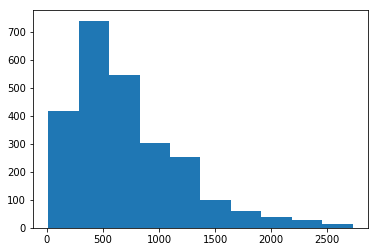

In [43]:
# Create histogram of predictions 
matplotlib.pyplot.hist(y_pred)

<h1 style="color:red;">QUESTION 4: MODEL PREDICTIONS</h1>

**Analyze the model predictions. Does the output distribution match the one you made earlier in the case study? What other features/strategies could we use to make our model even better, if we had more time?**

*The model prediction matches the original data. If we had more time, we need to further more select the features with more influence on the model, discard the features with little or no influence.*

# Feature Importance

In [44]:
# Compute feature importance of model
# You can use the feature_importances function we defined for you
# Or, see the feature_importances_ attribute of our model
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
feature_importances(model, feature_matrix.columns, n=25)

1: Feature: pickup_neighborhoods.MAX(trips.passenger_count), 0.861
2: Feature: HOUR(pickup_datetime), 0.035
3: Feature: dropoff_neighborhoods.STD(trips.trip_duration), 0.026
4: Feature: dropoff_neighborhoods.MEAN(trips.passenger_count), 0.026
5: Feature: payment_type, 0.014
6: Feature: pickup_neighborhoods.longitude, 0.010
7: Feature: MINUTE(dropoff_datetime), 0.008
8: Feature: MONTH(pickup_datetime), 0.007
9: Feature: dropoff_neighborhoods.MEDIAN(trips.vendor_id), 0.005
10: Feature: pickup_neighborhoods.SUM(trips.trip_distance), 0.002
11: Feature: WEEK(dropoff_datetime), 0.001
12: Feature: pickup_neighborhoods.MIN(trips.trip_distance), 0.001
13: Feature: dropoff_neighborhoods.MEDIAN(trips.trip_distance), 0.001
14: Feature: dropoff_neighborhoods.MEAN(trips.trip_distance), 0.001
15: Feature: dropoff_neighborhoods.STD(trips.passenger_count), 0.000
16: Feature: IS_WEEKEND(pickup_datetime), 0.000
17: Feature: dropoff_neighborhood = AA, 0.000
18: Feature: pickup_neighborhoods.latitude, 0.00

<h1 style="color:red;">QUESTION 5: FEATURE IMPORTANCE</h1>

**Analyze the feature importance values you just computed above. Do they make sense? Are there any values you are surprised by? Give some brief explanations as to why these features are relevant in computing the `trip_duration` target variable.**

*It makes sense. It's surprise that **MONTH** is has a relative high influence. It is easy to understand that the trip duration is dominated by the `pick up`  and `drop off`  location. Because taxi tend to pick up more people in cetain area, such as comerical district. Also, the pick up hour has more inflence because most of trips happen during the rush hours of the day.
*

<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@6.1_instruction_manual.html) to wrap up this case study properly.